# # The code below generates the PDF for avg daily distance travelled by PHEV

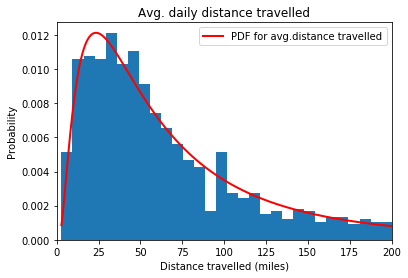

In [12]:
#Importing modules

import matplotlib.pyplot as plt
import random
import numpy as np



mu, sigma = 4., 0.92 # mean and standard deviation
s = np.random.lognormal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 100, density=True, align='mid')

x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi)))


# plotting the variables
plt.plot(x, pdf, linewidth=2, color='r',label='PDF for avg.distance travelled')
plt.xlabel('Distance travelled (miles)') 
plt.ylabel('Probability') 
plt.title('Avg. daily distance travelled')
plt.xlim(0,200) 
plt.legend()



# saving the graph

plt.savefig('Avg distance travelled pu.png',dpi=600)
plt.show()



## Code below generates the SOC curve for particular distance travelled for PHEV 30

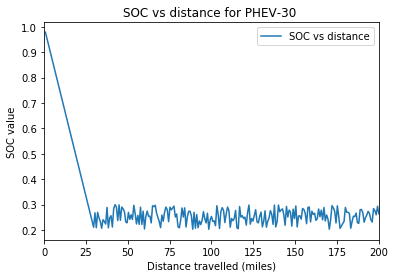

In [19]:
#Importing modules

import matplotlib.pyplot as plt
import random
import numpy as np


#Declaration of variables
soc_value=np.array([])   #null array to store the soc values generated
distance_value=np.array([]) # null array to store distance value
d_drivingdistance_tmp=0
""" This function returns SOC based on distance based on PHEV 30"""
def calc_SOC(x):
    
    if x <= 30:
        return max(0.2,1-0.02667*x)
    
    else:
        return np.random.uniform(0.2,0.3)
    
for i in range (90000):    
    d_drivingdistance_tmp=d_drivingdistance_tmp+0.8
    soc_value_tmp=calc_SOC(d_drivingdistance_tmp)
    soc_value=np.append(soc_value,soc_value_tmp)
    distance_value=np.append(distance_value,d_drivingdistance_tmp)
    

# plotting the variables
plt.plot(distance_value, soc_value,label='SOC vs distance'  )
plt.xlabel('Distance travelled (miles)') 
plt.ylabel('SOC value') 
plt.title('SOC vs distance for PHEV-30 ')
plt.xlim(0,200) 
plt.legend()




# saving the graph

plt.savefig('SOC vs distance.png',dpi=600)
plt.show()

    


## Code below gives the battery characterstics of PHEV-30 during charging
    PHEV-30 lithium ion battery data
    charging time(120v)=7 hr
    KWhr= 8kwhr
    Rated power=1.143kW
    
    But the figure of miniproject report will be used 

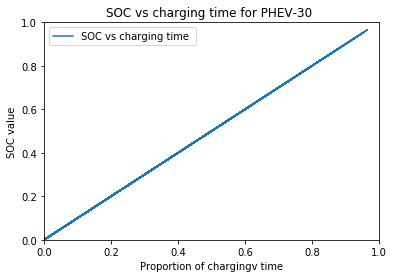

In [31]:
#Importing modules

import matplotlib.pyplot as plt
import random
import numpy as np



soc=np.random.uniform(-1,1,100)
time=soc

# plotting the variables
plt.plot(time,soc,label='SOC vs charging time ')
plt.xlabel('Proportion of chargingv time') 
plt.ylabel('SOC value') 
plt.title('SOC vs charging time for PHEV-30 ')
plt.xlim(0,1) 
plt.ylim(0,1)
plt.legend()




# saving the graph

#plt.savefig('SOC vs distance.png',dpi=600)
plt.show()


# Code below generates charging profile for indivudial PHEV

,col1,col2
0,1,213.741
1,2,131.445
2,3,72.009
3,4,30.861
4,5,4.572
5,6,1.143
6,7,2.286
7,8,4.572
8,9,16.002
9,10,28.575


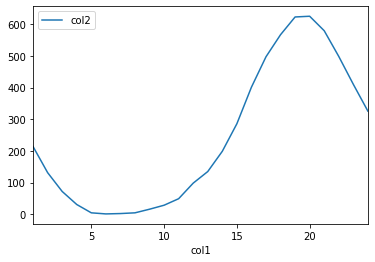

In [8]:
#Importing modules

import matplotlib.pyplot as plt
import random
import numpy as np
import math as mt
import pandas as pd


# function-01 generates Avg. distance travelled for each sampling,takes a random number as argument
def calc_dist(x):
    M=4+0.92*x  # mean=4 and sd=0.92
    return mt.exp(M)
# function=02 generates creoessponding SOC value.takes distance travelled as argument
def calc_SOC(x):
    
    if x <= 30:
        return max(0.2,1-0.02667*x)
    
    else:
        return np.random.uniform(0.2,0.3)
# function-03 generates required time to fully charge PHEV,takes SOC value as argument
def calc_ct(x):
    time=(1-x)*7          #rated time period required is 7 hrs
    return time

# function-04 generates required charging instant time,takes random number betn 0&1 as argument
def calc_cit(x):
    if 0.5<x<=1.0:
        Q=1-x
    else:
        Q=x
    b=mt.sqrt(-2*np.log(Q))  
    N=2.515517+0.802853*b+0.010328*b*b
    D=1+1.432788*b+0.189269*b*b+0.001308*b*b*b
    a=b-N/D
    if 0.5<x<1.0:
        Y=a
    elif  x==0.5:
        Y=0
    else:
        Y=-a
    charging_instant_time=17.4+3.3*Y    
    return charging_instant_time

#main code that generates the charging profile in matrix form,takes charging instant time and charging time as argument
d={'col1': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], 'col2': [0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]}
df=pd.DataFrame(data=d)

for i in range (1000):    #Fixed number of samples taken so that there is steady charging profile made
  
    random1=random.uniform(-1,1)
    random2=random.uniform(0,1)
    distance=calc_dist(random1)
    socvalue=calc_SOC(distance)
    c_time_tmp=calc_ct(socvalue)
    st_time_tmp=calc_cit(random2)
    c_time=round(c_time_tmp)
    st_time=round(st_time_tmp)
    if st_time>24:
        st_time=24
    index=st_time-1

    for i in range(c_time):

        df.iat[index,1]=df.iat[index,1]+1.143
        index=index+1
        if index>23:
            index=0
            
    dfnew=df
     
dfnew.plot(x='col1',y='col2')
dfnew




In [1]:
import numpy as np
import FukuML.LeastSquaresSVM as least_squares_svm

least_squares_mc = least_squares_svm.MultiClassifier()
least_squares_mc.load_train_data()
least_squares_mc.set_param(lambda_p=pow(10, -3), gamma=1, C=0.1)

least_squares_mc.init_W()

least_squares_mc.train()

test_data = '0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0'

prediction = least_squares_mc.prediction(test_data)

ModuleNotFoundError: No module named 'FukuML'

TypeError: Can only add LpConstraintVar, LpConstraint, LpAffineExpression or True objects